# Introducción:
Este dataset de riesgo crediticio contiene información sobre 32,581 solicitudes de crédito y sus características asociadas, distribuidas en 12 columnas.

El dataset fue extraido de kaggle.

El dataset escogido va a ser de gran utilidad a los fines de evaluar el perfil de riesgo de los solicitantes.

# Objetivo del trabajo:

El objetivo principal es predecir la concesión o denegación de un credito (determinado por la columna loan_status).

Con esta información, las instituciones financieras pueden tomar decisiones más informadas sobre la concesión de créditos, ajustando las tasas de interés o rechazando a solicitantes con alto riesgo.


# Contexto analíticio
Se utilizará un modelo de clasificiación para determinar cuáles prestamos seran aprobados y cuáles no.

# Hipótesis:

Los ingresos más altos y un historial crediticio más largo se les otorgará el crédito.

Los solicitantes más jóvenes o con menor estabilidad laboral (menor duración en el empleo) tienen más probabilidades de ser rechazados.

# Diccionarios de datos de variables
	1.	person_age: Edad de la persona que solicita el crédito
	2.	person_income: Ingresos anuales de la persona.
	3.	person_home_ownership: Tipo de propiedad de la vivienda (e.g., alquiler, propia, hipotecada).
	4.	person_emp_length: Duración en años del empleo actual.
	5.	loan_intent: Propósito del préstamo (e.g., personal, médico, educativo).
	6.	loan_grade: Calificación del préstamo (e.g., A, B, C, D).
	7.	loan_amnt: Monto solicitado en el préstamo.
	8.	loan_int_rate: Tasa de interés aplicada al préstamo.
	9.	loan_status: Estado del préstamo (1 = aprobado, 0 = denegado).
	10.	loan_percent_income: Porcentaje de ingresos de la persona que representa el monto del préstamo.
	11.	cb_person_default_on_file: Historial de incumplimiento (Y = sí, N = no).
	12.	cb_person_cred_hist_length: Duración del historial crediticio de la persona (en años).

  



*Comienzo importando las librerías de Pandas y Numpy.
Luego cargamos el dataset y hacemos entradas para tener información del dataset.*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/coder/Data Science 1/Pre entrega Virginia Palmero/credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


Se puede observar que la media esta a 1,73 de la mediana.
El maximo en edad 144 pareciera ser un error

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.shape

(32581, 12)

## EDA

### Gráfico para visualizar outliers con boxplot

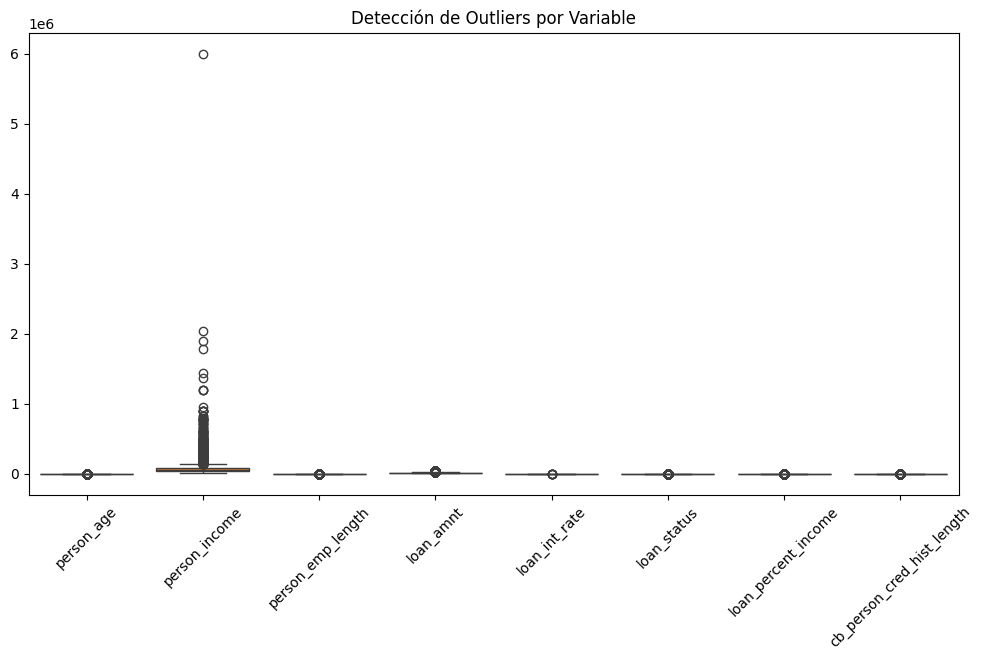

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Detección de Outliers por Variable')
plt.xticks(rotation=45)
plt.show()

Gráfico para visualizar nulos con mapa de calor

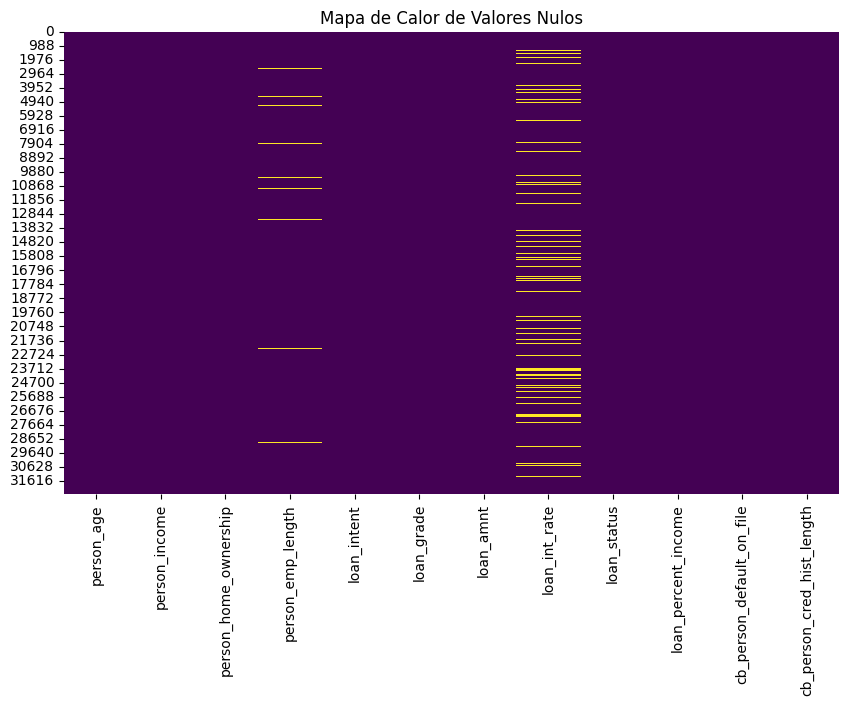

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')

plt.show()

plt.show()

Podemos ver que las únicas columnas que poseen nulos son person_emp_lenght y loan_int_rent

### Grafico de dispersión entre variables

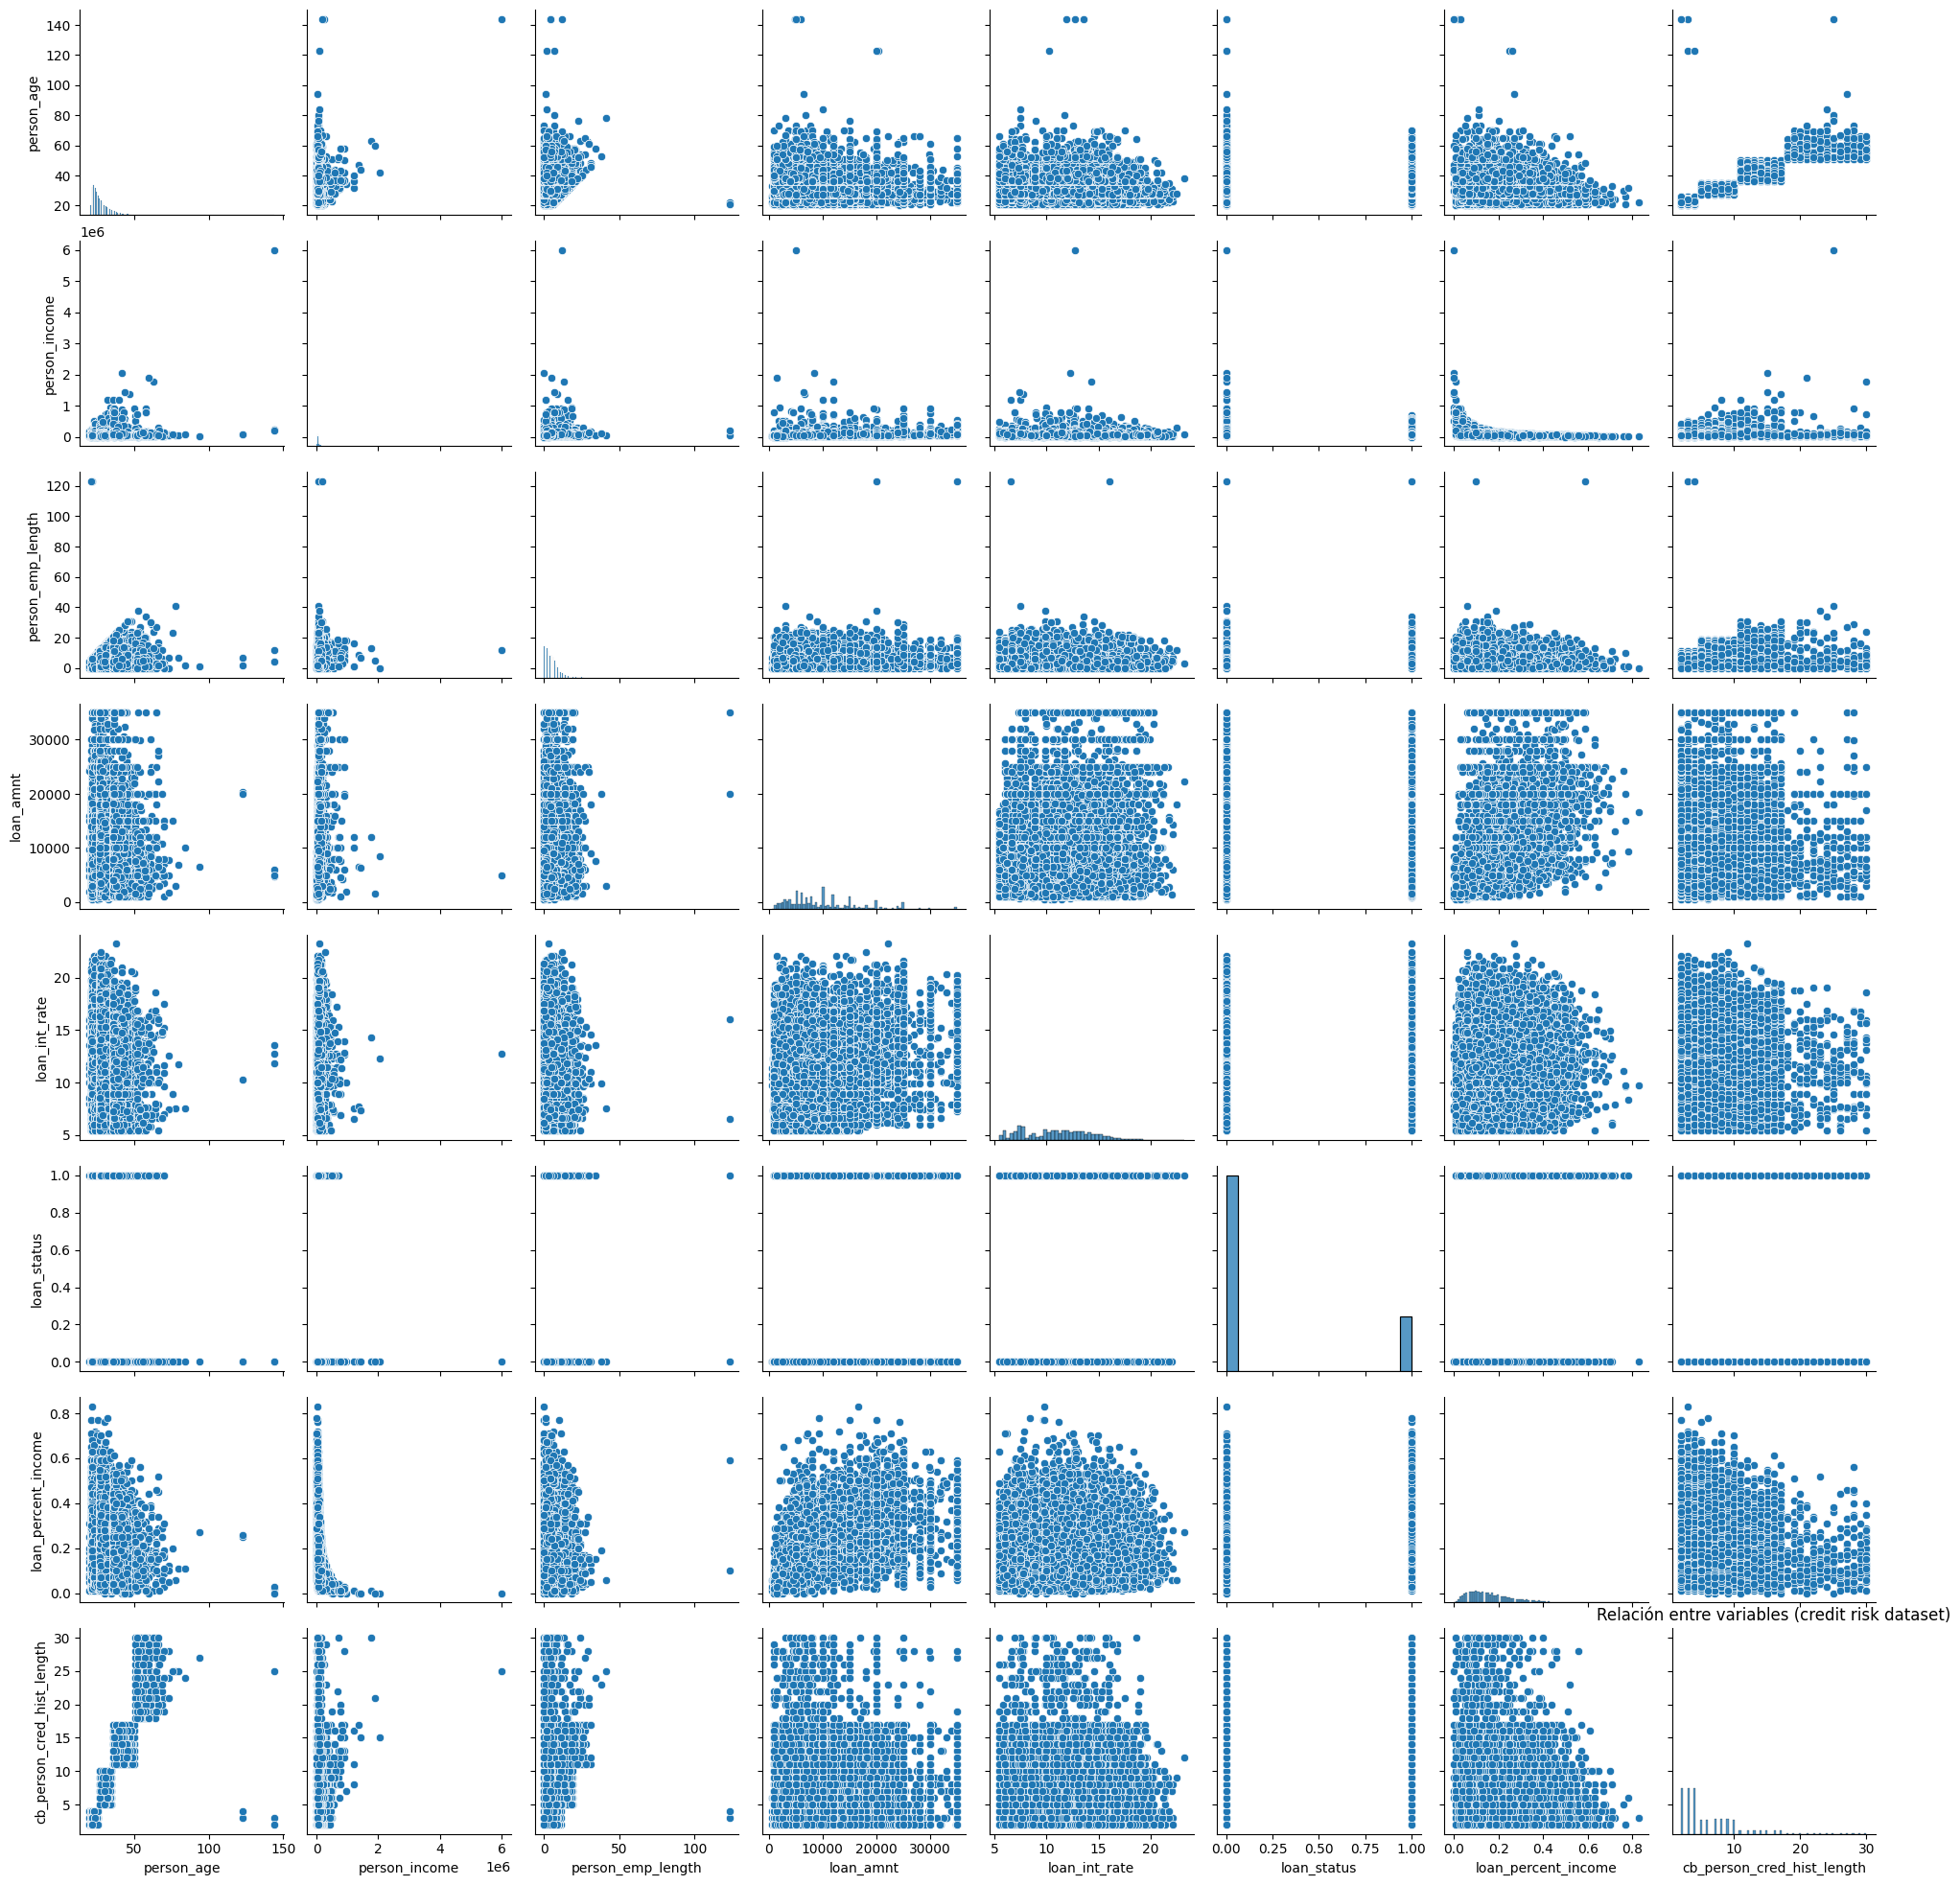

In [ ]:
sns.pairplot(df)
plt.title("Relación entre variables (credit risk dataset)")
plt.show()

### Histograma de características (credit risk dataset)

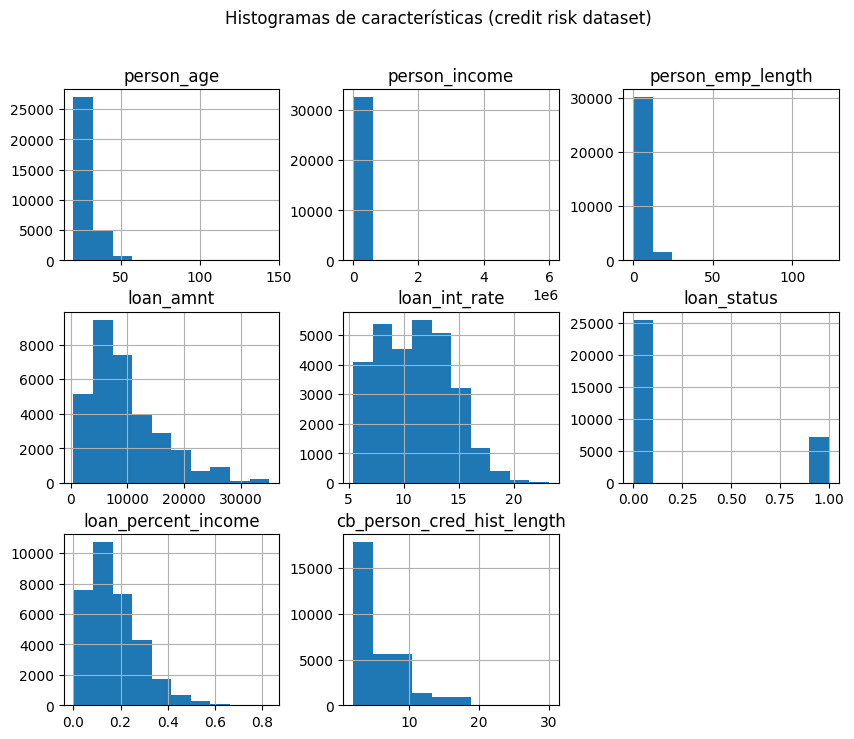

In [ ]:
df.hist(figsize=(10, 8))
plt.suptitle("Histogramas de características (credit risk dataset)")
plt.show()

Se advierte que el porcentaje que representa el crédito en los ingresos de los solicitantes en su mayoria no supera el 0,5%

### Histograma sobre el monto de los préstamos

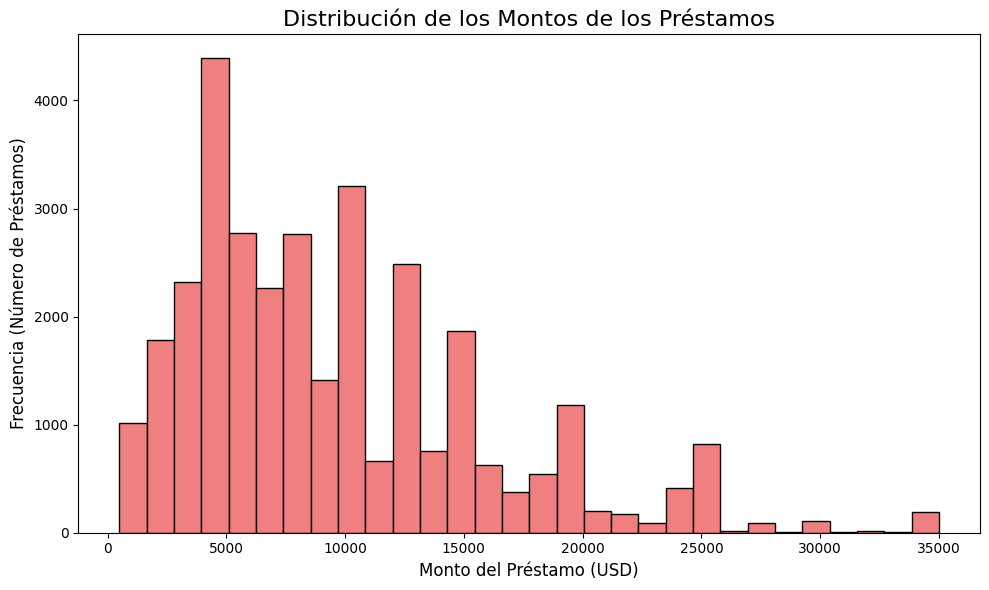

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de los Montos de los Préstamos', fontsize=16)
plt.xlabel('Monto del Préstamo (USD)', fontsize=12)
plt.ylabel('Frecuencia (Número de Préstamos)', fontsize=12)
plt.tight_layout()
plt.show()

Podemos observar  que la mayor cantidad de préstamos van de los
5.000 a los 10.000


### Grafico de barras apiladas

In [ ]:
total_records = len(df)
other_count = df['person_home_ownership'].value_counts().get('OTHER', 0)
other_percentage = (other_count / total_records) * 100
print(f"Porcentaje de 'OTHER': {other_percentage:.2f}%")

Porcentaje de 'OTHER': 0.33%


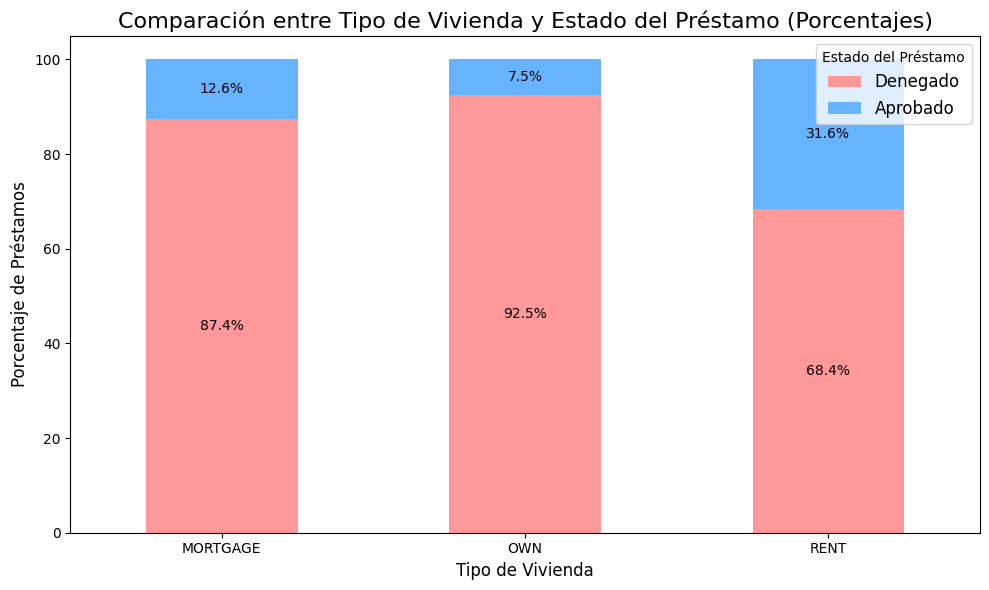

In [ ]:
dataset_filtered = df[df['person_home_ownership'] != 'OTHER']
cross_tab = pd.crosstab(dataset_filtered['person_home_ownership'], dataset_filtered['loan_status'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], ax=ax)
plt.title('Comparación entre Tipo de Vivienda y Estado del Préstamo (Porcentajes)', fontsize=16)
plt.xlabel('Tipo de Vivienda', fontsize=12)
plt.ylabel('Porcentaje de Préstamos', fontsize=12)
plt.legend(title='Estado del Préstamo', labels=['Denegado', 'Aprobado'], fontsize=12)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in container.datavalues], label_type='center', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Aca podemos ver que el hecho de que los solicitantes de los créditos que sean propietarios de la vivienda no influye en la aprobacion del prestamo, lo que intuitivamente podríamos pensar lo contrario porque es una vivienda que puede embargarse para luego ejecutar el credito.

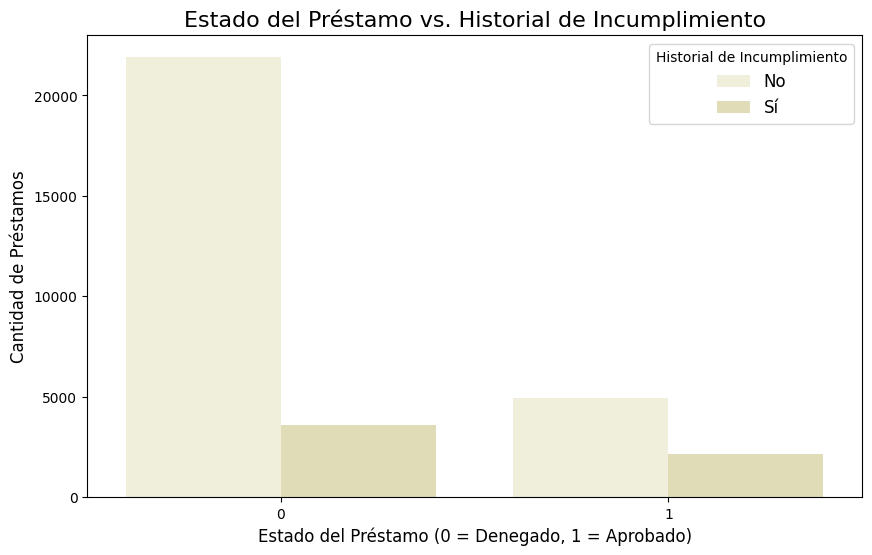

In [ ]:
sns.set_palette(sns.color_palette("pink_r")) # Changed 'ns' to 'sns'
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', hue='cb_person_default_on_file', data=df)
plt.title('Estado del Préstamo vs. Historial de Incumplimiento', fontsize=16)
plt.xlabel('Estado del Préstamo (0 = Denegado, 1 = Aprobado)', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.legend(title='Historial de Incumplimiento', labels=['No', 'Sí'], fontsize=12)

Pareciera ser que el historial de incumplimiento influye en la aprobación o no del préstamo.

# Edad segun estado de prestamo
Nos permite comparar la distribución de las edades de los solicitantes entre los préstamos aprobados y los denegados.

<ipython-input-16-83617200aaa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_age', data=df, palette='pink_r')


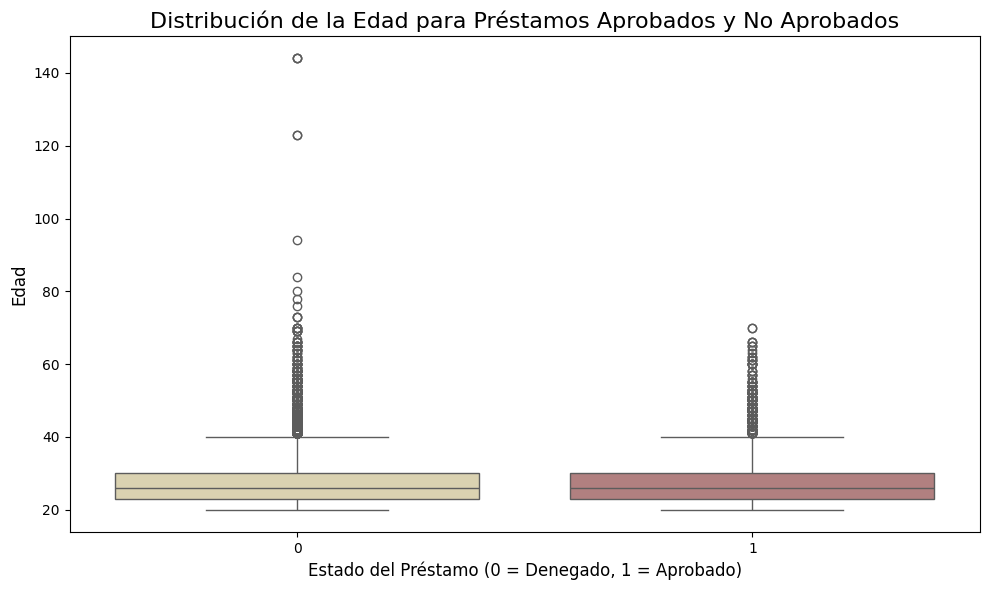

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_age', data=df, palette='pink_r')
plt.title('Distribución de la Edad para Préstamos Aprobados y No Aprobados', fontsize=16)
plt.xlabel('Estado del Préstamo (0 = Denegado, 1 = Aprobado)', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.tight_layout()
plt.show()

Este grafico nos ayuda a ver si la edad influye en la aprobación o denegación de los préstamos. En este caso la edad no influiria en el estado del prestamo.

Se observa que existen registros erroneos de edad como los que estan entre 120 y 140 años,lo que resulta imposible.

###Grafico distribucion de edades por destino del préstamo

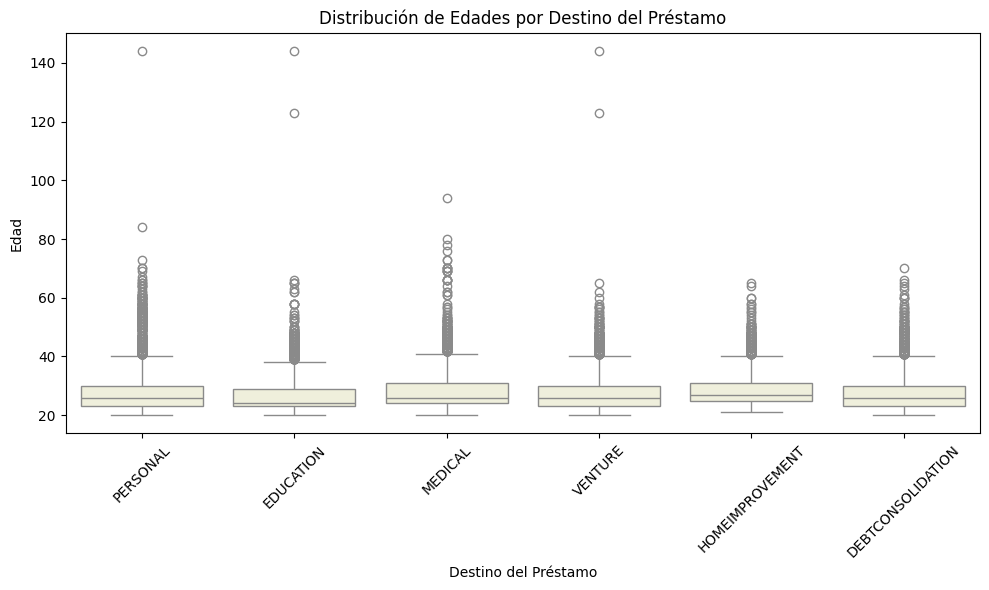

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_intent', y='person_age')
plt.title('Distribución de Edades por Destino del Préstamo')
plt.xlabel('Destino del Préstamo')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que en general los prestamos sea para el destino que sea lo saca gente entre 20 y 40 años. Podríamos haber pensado que para medicina iba a haber mayor cantidad de gente entre los 60/100 años.

### Grafico distribución destino del préstamo

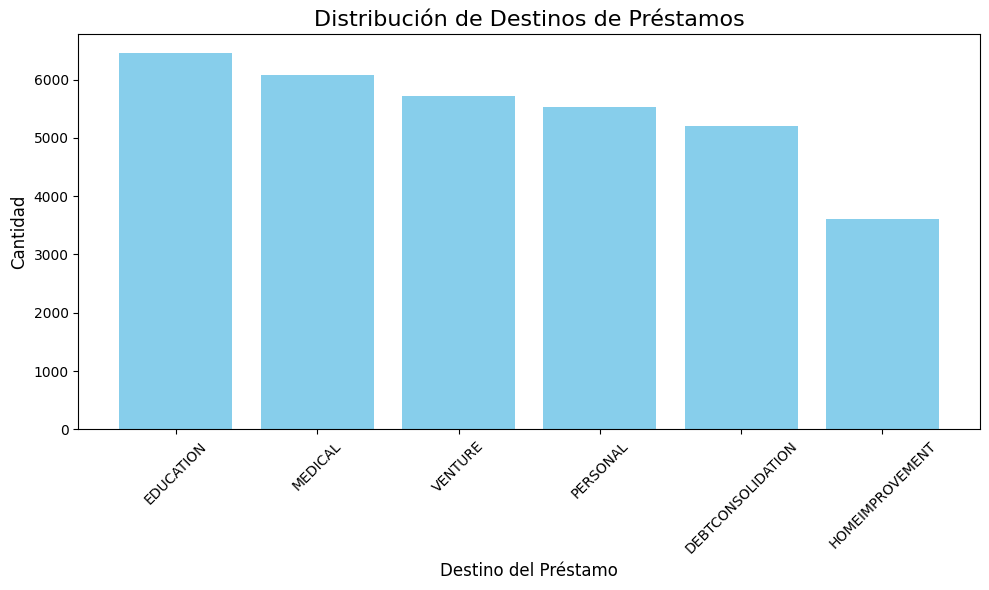

In [ ]:
loan_intent_counts = df['loan_intent'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(loan_intent_counts.index, loan_intent_counts.values, color='skyblue')
plt.title('Distribución de Destinos de Préstamos', fontsize=16)
plt.xlabel('Destino del Préstamo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Advertimos que la mayor cantidad de prestamos son destinados a educación y en segundo lugar a la medicina.

### Limpieza del dataset

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
32576,False
32577,False
32578,False
32579,False


Limpieza de nulos

In [ ]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64




Para person_emp_length: vamos a usar la mediana (50%)porque encontramos un maximo de 123 años (outlier) entonces la mediana que seria 4 años parece una mejor opción para la antiguedad laboral.

Para loan_int_rate: vamos a usar la media (mean) porque tiene una distribucion mas estable.

---



In [ ]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.77,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.09,6322.09,3.08,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,8.49,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,11.01,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.11,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


Tratamiento de outliers

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
for col in numeric_cols:
    handle_outliers(df, col)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23000.0,16.02,1,0.44,Y,3
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23000.0,15.23,1,0.44,N,2
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23000.0,14.27,1,0.44,Y,4


### Correlación

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


Transformación de variables categóricas

In [ ]:
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])

In [ ]:
person_home_ownership_mapping = {
    0: 'RENT',
    1: 'MORTGAGE',
    2: 'OWN',
    3: 'OTHER'
}

In [ ]:
label_encoder = LabelEncoder()
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])

In [ ]:
loan_intent_mapping = {
    0: 'PERSONAL',
    1: 'EDUCATION',
    2: 'MEDICAL',
    3: 'VENTURE'
}

In [ ]:
label_encoder = LabelEncoder()
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

In [ ]:
loan_grade_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G'
}

In [ ]:
label_encoder = LabelEncoder()
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [ ]:
cb_person_default_on_file_mapping = {
    0: 'N',
    1: 'Y'
}

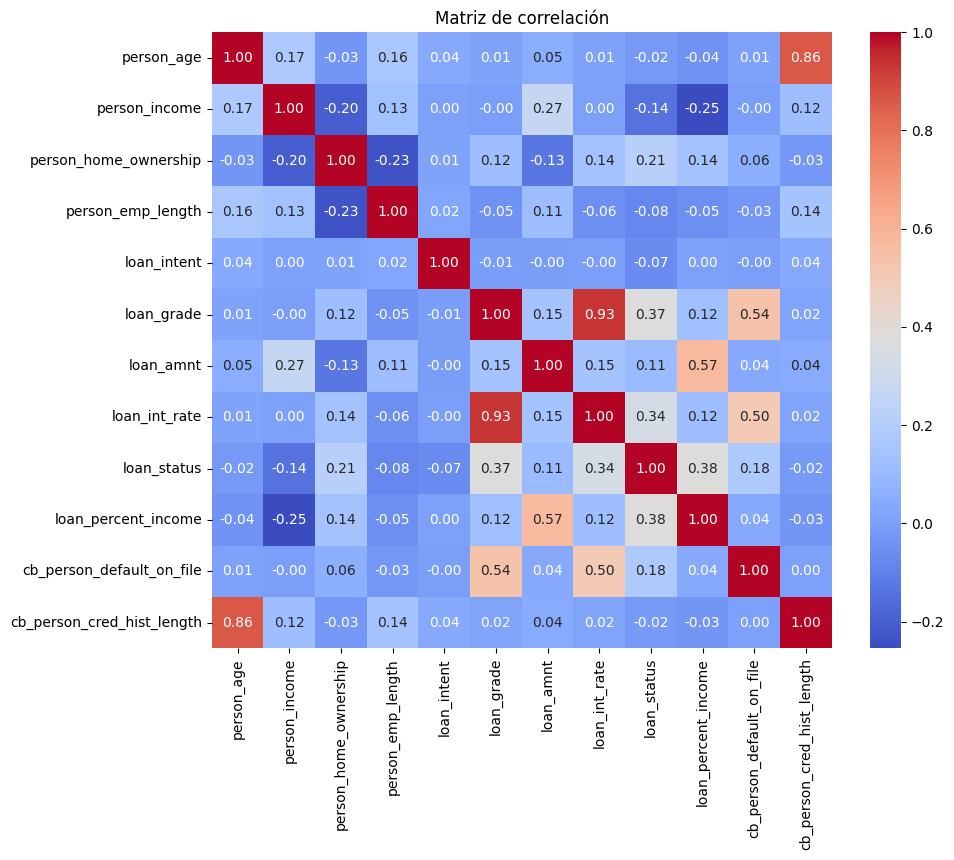

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()



La variable objetivo es loan_status y vemos que todas las variables tienen una correlación menor a 0.6 por lo cual, para el modelo de clasificación no vamos a descartar ninguna variable

## Modelo de clasificación

Escogimos el modelo de Random Forest para predecir el estado de crédito de un cliente, en este caso, la variable ‘loan_status’.

El objetivo principal de este modelo es predecir el estado de crédito de un cliente (si su préstamo es aprobado o rechazado).

In [ ]:
X_credit = df.drop('loan_status', axis=1)
y_credit = df['loan_status']
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

### Feature selection

In [ ]:

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    df[feature] = encoders[feature].fit_transform(df[feature]) # Fit and transform the data


X_credit = df.drop('loan_status', axis=1)
y_credit = df['loan_status']


X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)


estimator = RandomForestClassifier()
sfs = SFS(estimator,
          k_features=7,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)


sfs.fit(X_train_credit, y_train_credit)


X_train_credit_selected = sfs.transform(X_train_credit)
X_test_credit_selected = sfs.transform(X_test_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

In [ ]:

classifier_credit = RandomForestClassifier()
classifier_credit.fit(X_train_credit, y_train_credit)
y_pred_credit = classifier_credit.predict(X_test_credit)
accuracy_credit = accuracy_score(y_test_credit, y_pred_credit)
print("Accuracy (df):", accuracy_credit)

Accuracy (df): 0.9304894890286942


El 93.05% de las predicciones realizadas por el modelo son correctas.

Matriz de confusión

In [ ]:
cm = confusion_matrix(y_test_credit, y_pred_credit)

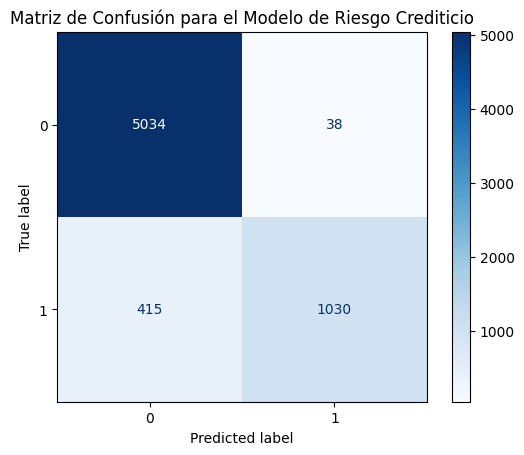

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_credit.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para el Modelo de Riesgo Crediticio')
plt.show()

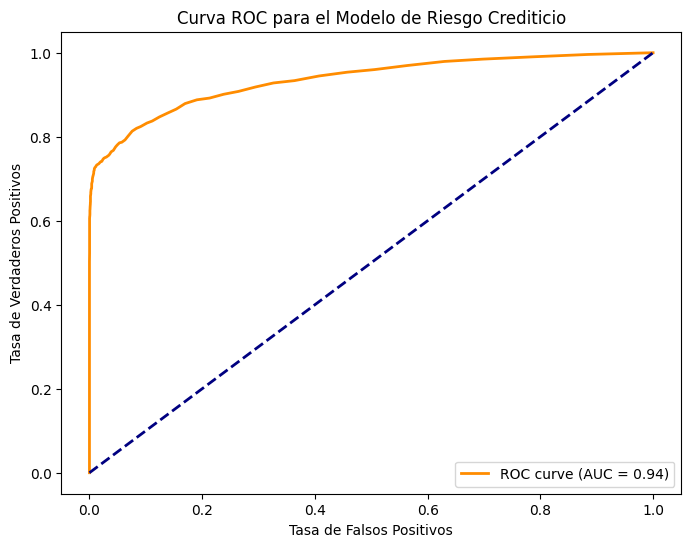

In [ ]:

# Calcular las probabilidades para la clase positiva
y_proba_credit = classifier_credit.predict_proba(X_test_credit)[:, 1]

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test_credit, y_proba_credit)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para el Modelo de Riesgo Crediticio')
plt.legend(loc="lower right")
plt.show()

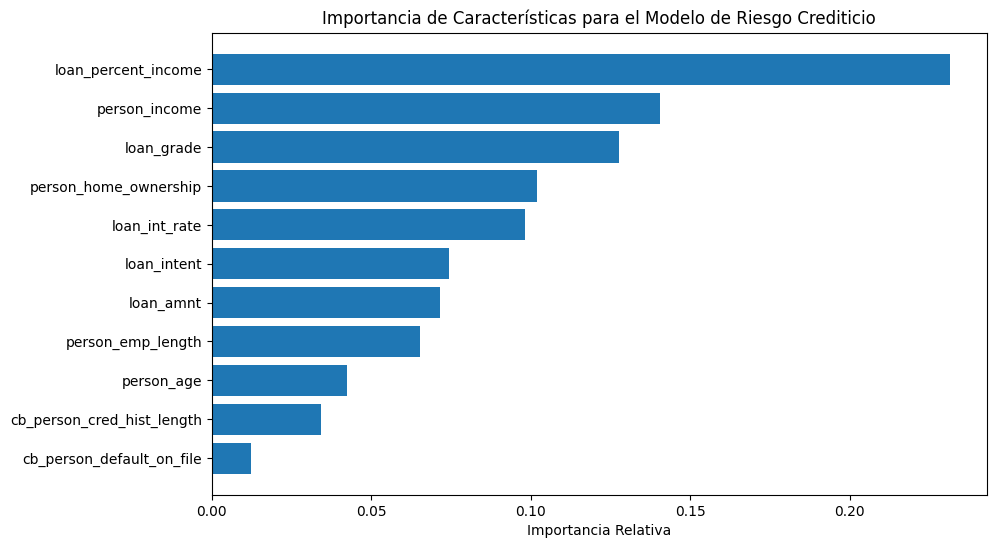

In [ ]:
# Obtener la importancia de las características
importances = classifier_credit.feature_importances_
features = X_train_credit.columns  # Asegúrate de que X_train_credit tenga los nombres de las características

# Ordenar las características por importancia
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características para el Modelo de Riesgo Crediticio')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

### Conlcusión
En conlusión lo más importante para aprobar o denegar el crédito es el porcentaje que representa el mismo en los ingresos del solicitante.

La edad no resulta relevante como pensamos al formular la hipótesis. Lo relevante es el porcentaje que representa el crédito en los ingresos, sea el monto que fuere. Tampoco se verificó que en el caso ser los solicitantes jóvenes o con menor estabilidad laboral tienen más probabilidades de ser rechazados.

El modelo escogido resultó adecuado a los fines de la clasificación s predecir el estado de crédito de un cliente (si su préstamo es aprobado o rechazado) habiendo obtenido una accuracy del 0.9304894890286942